In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize': (18, 6)})

In [95]:
df = pd.read_csv('data/census-data.csv', sep=', ', engine='python', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [96]:
#Rename columns
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
             'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
             'hours-per-week', 'native-country', 'income']

In [97]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [98]:
#locating invalid values. 
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [99]:
#locating invalid values.
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [100]:
#locating invalid values.
df['native-country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [101]:
# replace all '?' values to null
df = df.replace({'?': np.nan})

In [102]:
# drop null values
df = df.dropna()

In [103]:
#check for invalid values again
df['workclass'].value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [104]:
#check for invalid values again
df['occupation'].value_counts()

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64

In [105]:
#check for invalid values again
df['native-country'].value_counts()

United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Columbia                         56
Poland                           56
Taiwan                           42
Iran                             42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
Ecuador                     

In [106]:
#convert 'income' to an ordered categorial type
df['income'].value_counts()

<=50K    22654
>50K      7508
Name: income, dtype: int64

In [107]:
#turn Income column to ordered categorical type with ['<=50K',<50K']
from pandas.api.types import CategoricalDtype
inc_type = CategoricalDtype(['<=50K','>50K'],ordered = True)
df['income'] = df['income'].astype(inc_type)
df['income'].astype(inc_type).value_counts()

<=50K    22654
>50K      7508
Name: income, dtype: int64

In [108]:
#Create dummy variable '>50K' or '<=50K' and concatenate them to the dataframe.
pd.get_dummies(df['income']).head()

,<=50K,>50K
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [109]:
df = pd.concat([df,pd.get_dummies(df['income'])], axis=1)

In [110]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,<=50K,>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,0


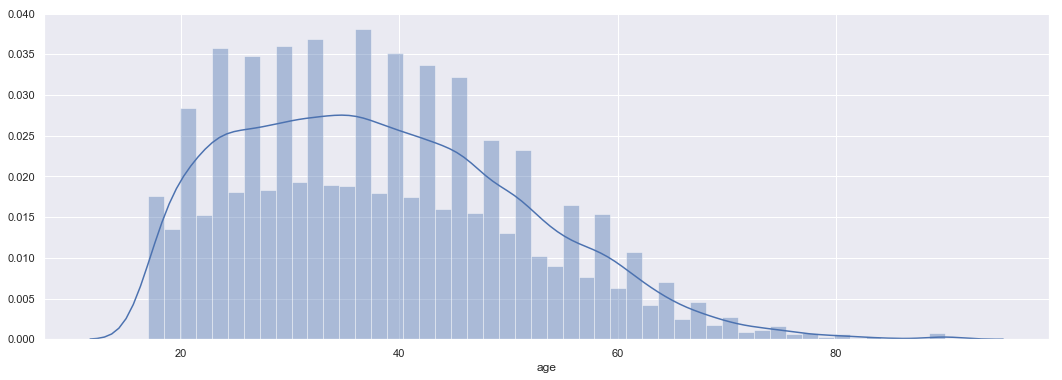

In [111]:
#plot displot showing the distribution of age.
sns.distplot(df['age'])

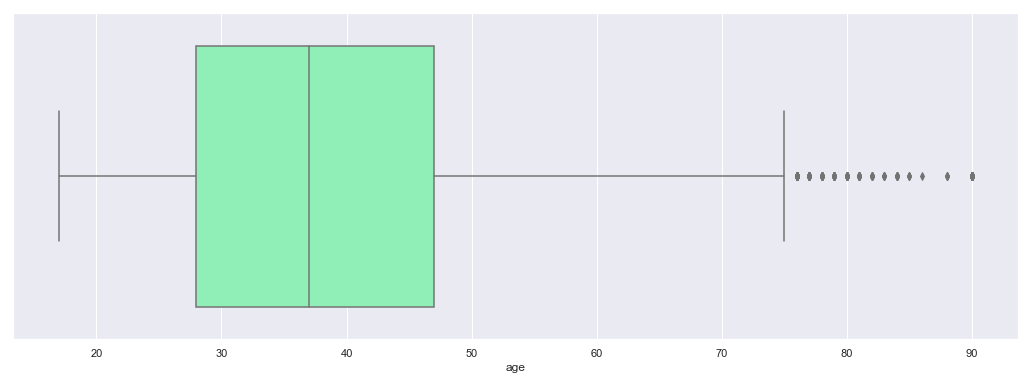

In [112]:
#plot boxplot showing the distribution of age.
sns.boxplot(x="age", data=df,palette='rainbow')

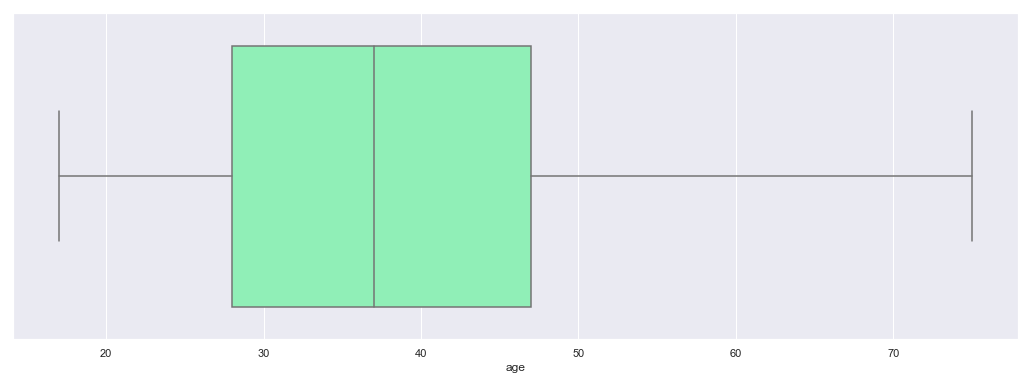

In [113]:
#remove outliers >75 of age
df_age = df[df['age'] <= 75]
sns.boxplot(x='age',data=df_age,palette='rainbow')

In [114]:
#Number of people work more than 20 hours per week
df.loc[df['hours-per-week'] >= 20]['hours-per-week'].count()

28828

In [115]:
#Number of men and women
num_male = df.loc[df['sex'] == 'Male']['sex'].count()
print("Male Count: {}".format(num_male))

num_female = df.loc[df['sex'] == 'Female']['sex'].count()
print("Female Count: {}".format(num_female))

total_rows = len(df['sex'])

male_pro = num_male/total_rows
print("Male Proportion: {}".format(male_pro))

female_pro = num_female/total_rows
print("Female Proportion: {}".format(female_pro))

Male Count: 20380
Female Count: 9782
Male Proportion: 0.6756846362973278
Female Proportion: 0.3243153637026722


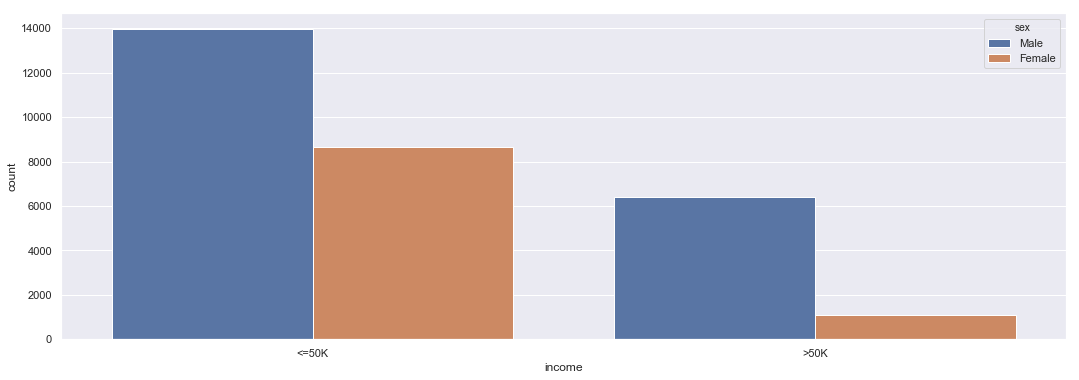

In [116]:
#Income by gender
sns.countplot(x='income',hue='sex', data=df)

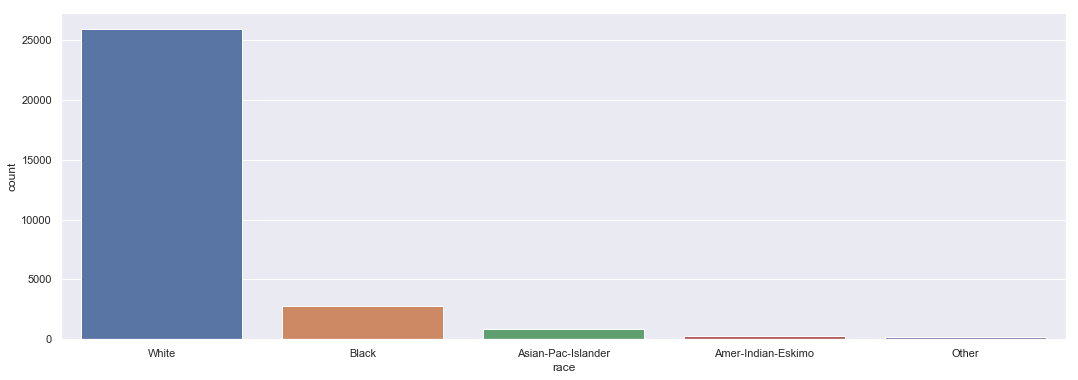

In [117]:
#count by race
sns.countplot(x='race',data=df)

In [118]:
#count by race
df['race'].value_counts()

White                 25933
Black                  2817
Asian-Pac-Islander      895
Amer-Indian-Eskimo      286
Other                   231
Name: race, dtype: int64

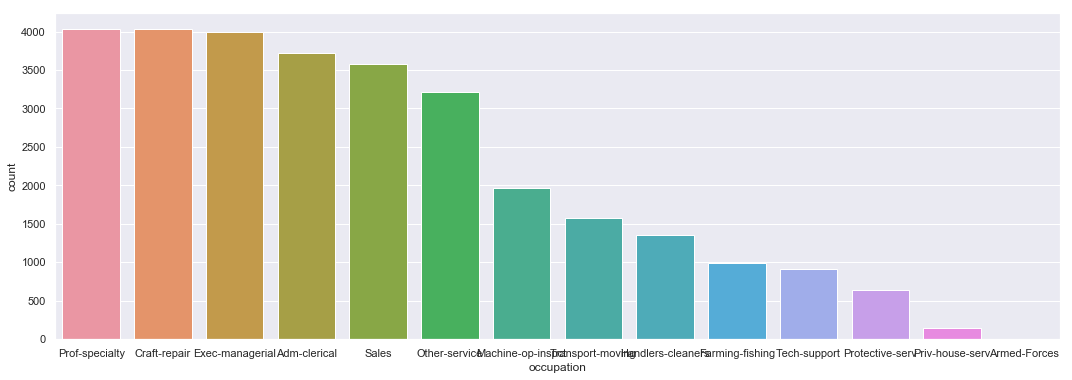

In [119]:
#count by Occupation
sns.countplot(x='occupation',data=df,order=df['occupation'].value_counts().index)

In [120]:
#count by Occupation
df['occupation'].value_counts()

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64

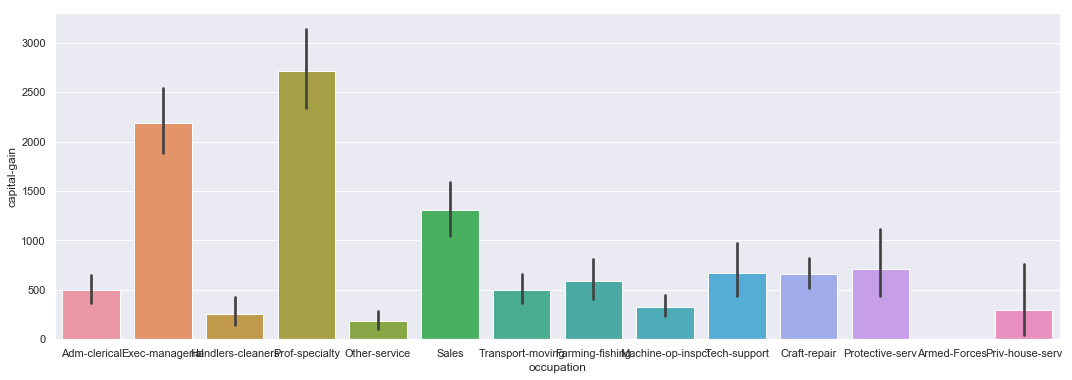

In [121]:
sns.barplot(x='occupation',y='capital-gain',data=df)

In [122]:
#count by Capital-Gain
df['occupation'].value_counts()

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64

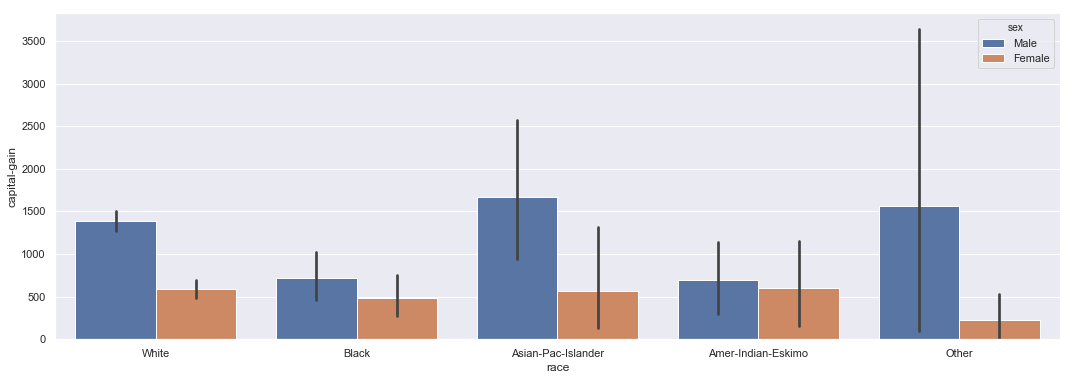

In [123]:
sns.barplot(x='race',y='capital-gain',hue='sex',data=df)

In [124]:
df['capital-gain'].groupby([df['race'],df['sex']]).mean()

race                sex   
Amer-Indian-Eskimo  Female     605.682243
                    Male       692.932961
Asian-Pac-Islander  Female     564.204082
                    Male      1666.455907
Black               Female     484.871337
                    Male       722.966855
Other               Female     223.873563
                    Male      1566.208333
White               Female     588.850285
                    Male      1385.042466
Name: capital-gain, dtype: float64